In [1]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

In [2]:
# Se Cargan los diferentes Dataset para su posterior análisis
vel_loc= pd.read_csv('data/Acc_vel_loc_sinrangos.csv')
acc_tec= pd.read_csv('data/Accesos Por Tecnología.csv')
acc_loc_velrangos= pd.read_csv('data/Accesos por velocidad.csv')
acc_loc_tec= pd.read_csv('data/Accesos_tecnologia_localidad.csv')
dialbaf_prov= pd.read_csv('data/Dial-BAf.csv')
ingresos= pd.read_csv('data/Ingresos .csv')
penetracion_hogares= pd.read_csv('data/Penetracion-hogares.csv')
penetracion_poblacion= pd.read_csv('data/Penetración-poblacion.csv')
penetracion_totales= pd.read_csv('data/Penetracion-totales.csv')
total_acc_tec= pd.read_csv('data/Totales Accesos Por Tecnología.csv')
total_acc_velrangos= pd.read_csv('data/Totales Accesos por velocidad.csv')
total_dialbaf= pd.read_csv('data/Totales Dial-BAf.csv')
total_vmd= pd.read_csv('data/Totales VMD.csv')
vel_media_prov= pd.read_csv('data/Velocidad % por prov.csv')
vel_prov= pd.read_csv('data/Velocidad_sin_Rangos.csv')
mapa_conectividad= pd.read_csv('data/mapa_conectividad.csv')

# ANALISIS EXPLORATORIO PENETRACION DE INTERNET


Este análisis tiene como objetivo evaluar el nivel de penetración de Internet en Argentina, identificando patrones y tendencias en el acceso a la red a nivel nacional. Se examinarán datos sobre la disponibilidad y cobertura del servicio para entender mejor cómo se distribuye el acceso a Internet entre las distintas regiones del país de igual forma la penetración que puede estar influyendo en el desarrollo económico y social.

In [3]:
# Resumen estadístico descriptivo solo para las columnas numéricas relevantes
print(penetracion_totales[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].describe())


       Accesos por cada 100 hogares  Accesos por cada 100 hab
count                     41.000000                 41.000000
mean                      62.837711                 19.452761
std                        9.786571                  3.211263
min                       49.545821                 15.050104
25%                       53.734186                 16.504676
50%                       62.479166                 19.307907
75%                       70.578853                 21.982550
max                       78.890000                 24.790000


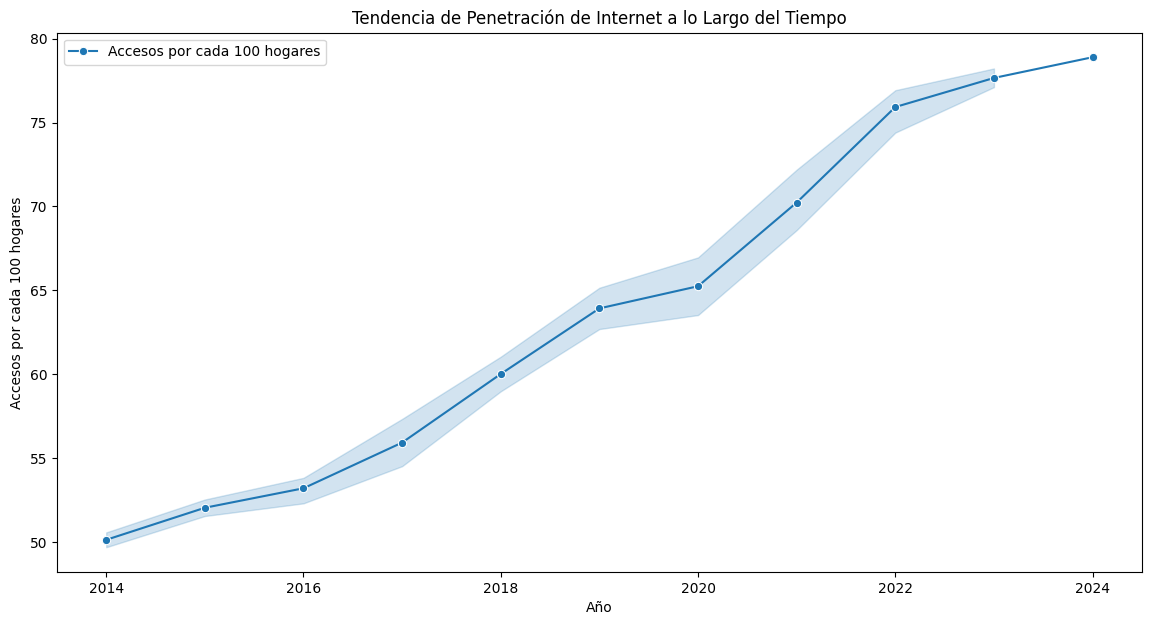

In [4]:
# Tendencia general de Acceso por cada 100 hogares y por cada 100 hab
# Configuración de la figura para el gráfico
plt.figure(figsize=(14, 7))  # Ajusta el tamaño de la figura (ancho, alto)

# Crear un gráfico de líneas para visualizar la tendencia de accesos
sns.lineplot(
    data=penetracion_totales,           # Datos a visualizar
    x='Año',                           # Variable en el eje x (años)
    y='Accesos por cada 100 hogares',  # Variable en el eje y (accesos por cada 100 hogares)
    marker='o',                        # Marca cada punto de datos con un círculo
    label='Accesos por cada 100 hogares'  # Etiqueta de la serie de datos
)

# Configurar el título del gráfico
plt.title('Tendencia de Penetración de Internet a lo Largo del Tiempo')

# Configurar la leyenda del gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

 El gráfico muestra que cada vez más hogares están obteniendo acceso a internet, lo que sugiere un progreso significativo en la expansión de la infraestructura de telecomunicaciones en Argentina. De igual manera la tendencia al alza en la penetración de internet indica un mercado en expansión. Un crecimiento constante refleja que más personas y familias están adoptando el uso de internet en su vida diaria, lo que podría abrir nuevas oportunidades para la industria de telecomunicaciones.


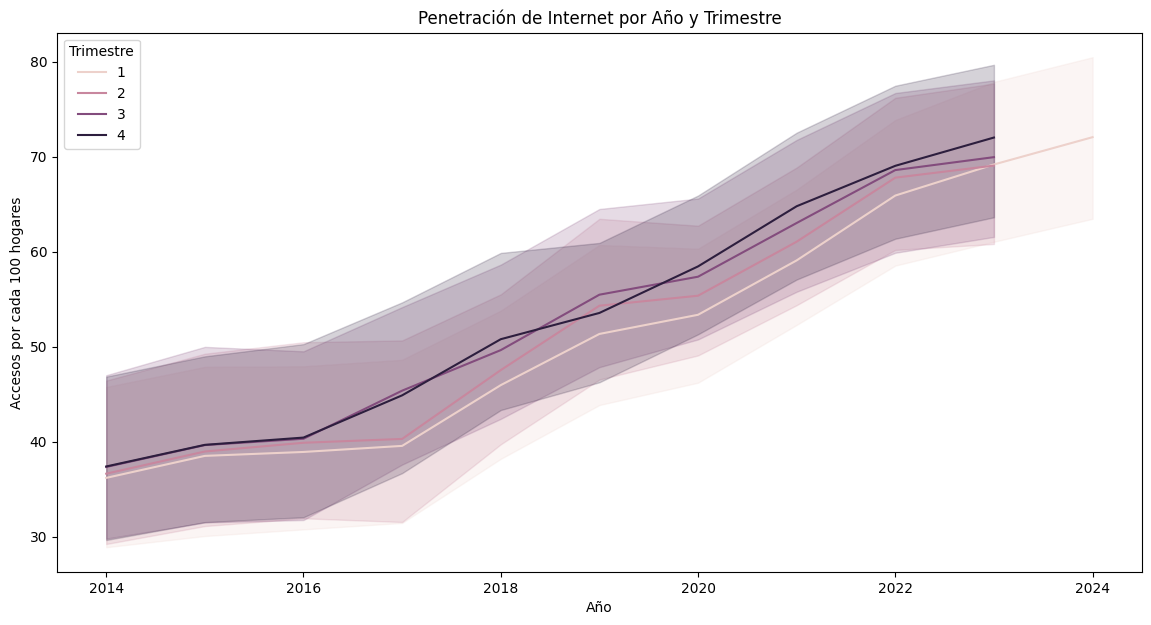

In [5]:
# Visualización de la penetración por año y trimestre
# Configuración de la figura para el gráfico
plt.figure(figsize=(14, 7))  # Define el tamaño de la figura (ancho, alto) en pulgadas

# Crear un gráfico de líneas para visualizar la penetración de Internet
sns.lineplot(
    data=penetracion_hogares,         # Datos a visualizar
    x='Año',                         # Variable en el eje x (años)
    y='Accesos por cada 100 hogares', # Variable en el eje y (accesos por cada 100 hogares)
    hue='Trimestre'                   # Variable para colorear las líneas según el trimestre
)

# Configurar el título del gráfico
plt.title('Penetración de Internet por Año y Trimestre')

# Mostrar el gráfico
plt.show()


El gráfico ilustra claramente un crecimiento sostenido en la penetración de internet desde 2014 hasta 2024 en acceso por cada 100 hogares, esta tendencia positiva sugiere que cada vez más hogares han obtenido acceso a internet, lo cual es crucial para el desarrollo económico y social.

C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_17256\646680241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


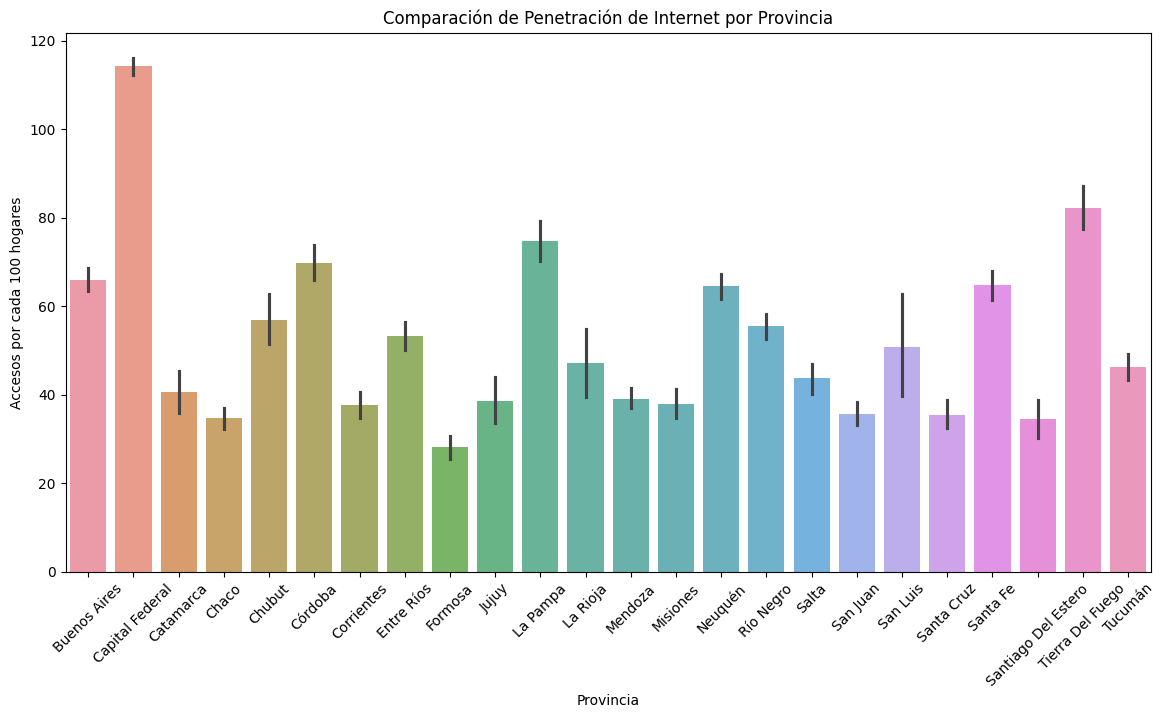

In [6]:
# Gráfico de barras agrupadas por provincia
# Configuración de la figura para el gráfico
plt.figure(figsize=(14, 7))  

# Crear un gráfico de barras para comparar la penetración de Internet por provincia
sns.barplot(
    x='Provincia',                             # Variable en el eje x: provincias
    y='Accesos por cada 100 hogares',           # Variable en el eje y: accesos por cada 100 hogares
    data=penetracion_hogares,                   # DataFrame que contiene los datos a visualizar
    palette='husl',                            # Paleta de colores 'husl' de seaborn para un conjunto de colores armoniosos
    alpha=0.8,                                 # Transparencia de las barras: 0.8 (un poco más opaca que antes)
    label='Accesos por cada 100 hogares'        # Etiqueta que aparecerá en la leyenda para describir las barras
)

# Configurar el título del gráfico
plt.title('Comparación de Penetración de Internet por Provincia')  

# Configurar la rotación de las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)  

# Mostrar el gráfico
plt.show()  

La comparación de la penetración de internet entre provincias revela disparidades significativas en la cobertura de internet en Argentina. Por ejemplo, la diferencia entre Formosa y Capital Federal es notoria: mientras que Capital Federal muestra una alta penetración de internet, Formosa registra una cobertura considerablemente menor. Estas diferencias pueden reflejar desigualdades en el desarrollo de la infraestructura tecnológica y en el acceso a servicios de internet en distintas regiones del país.

Además, las regiones con baja penetración, como Formosa, representan una oportunidad importante para el crecimiento del mercado de telecomunicaciones. Es por tal razón que ustedes como empresa de servicios de internet pueden tener oportunidad para expandir su alcance y mejorar la cobertura, contribuyendo al desarrollo económico y social de estas regiones. Este análisis sugiere que, al enfocarse en provincias con menor penetración, las empresas podrían capitalizar nuevas oportunidades de negocio y fomentar una mayor equidad en el acceso a la conectividad.

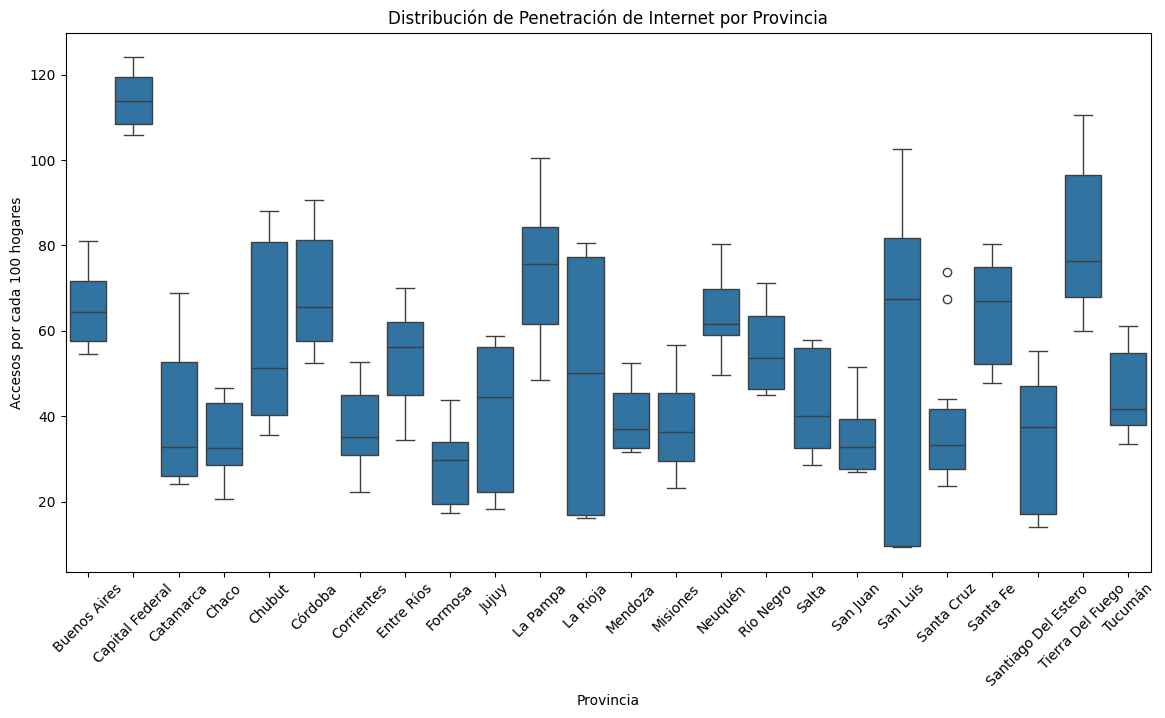

In [7]:
# Visualización de penetración por provincia
# Configuración de la figura para el gráfico
plt.figure(figsize=(14, 7))  # Define el tamaño de la figura (ancho, alto) en pulgadas

# Crear un gráfico de caja para visualizar la distribución de accesos por provincia
sns.boxplot(
    data=penetracion_hogares,                  # Datos a visualizar
    x='Provincia',                             # Variable en el eje x (provincias)
    y='Accesos por cada 100 hogares'            # Variable en el eje y (accesos por cada 100 hogares)
)

# Configurar el título del gráfico
plt.title('Distribución de Penetración de Internet por Provincia')

# Configurar la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)                       # Rota las etiquetas del eje x 45 grados

# Mostrar el gráfico
plt.show()


El gráfico de cajas muestra la distribución de la penetración de internet por provincia, destacando varias tendencias importantes. En primer lugar, Capital Federal se posiciona con el mayor nivel de acceso a internet por cada 100 hogares en comparación con otras provincias. Este alto nivel de penetración podría atribuirse a factores como una infraestructura de telecomunicaciones más desarrollada, una mayor densidad de población urbana con acceso a servicios, un poder adquisitivo superior, o políticas gubernamentales específicas que fomentan la conectividad en áreas metropolitanas.

En contraste, la provincia de San Luis exhibe una gran variabilidad en la penetración de internet, con una caja que abarca desde casi 8 hasta 80 accesos por cada 100 hogares. Esta amplia variabilidad sugiere que dentro de la provincia existen áreas con muy baja penetración, posiblemente en zonas rurales o menos desarrolladas, y otras con alta penetración, probablemente en zonas urbanas o mejor conectadas.

Además, es importante notar la presencia de outliers en la provincia de Santa Cruz. Estos outliers podrían corresponder a áreas específicas, como distritos o municipios dentro de la provincia, donde se ha invertido significativamente en infraestructura de telecomunicaciones o donde hay una mayor concentración de población urbana. Investigar estos outliers podría revelar prácticas o políticas exitosas que podrían replicarse en otras áreas para mejorar la penetración de internet.

## ANALISIS DE ACCESO Y TIPO DE TECNOLOGIA 

En esta sección, se realizará un análisis detallado sobre las diferentes formas en que los usuarios acceden a Internet y las tecnologías que utilizan. Además se estudiarán las categorías de acceso disponibles para Argentina y se compararán las distintas tecnologías en términos de su adopción en el país.

### Accesibilidad a internet

Este apartado evaluará la disponibilidad y cobertura de Internet en distintas regiones de Argentina. Se analizarán los factores que afectan la accesibilidad, como la infraestructura existente y las disparidades regionales, para identificar áreas con alta o baja cobertura

In [8]:
# Resumen estadístico descriptivo por tipo de acceso
print(acc_tec[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].describe())

               ADSL    Cablemodem  Fibra óptica       Wireless          Otros  \
count  9.840000e+02  9.840000e+02  9.840000e+02     984.000000     984.000000   
mean   1.150317e+05  1.832892e+05  4.728246e+04   12385.282520    6556.766260   
std    2.385989e+05  4.500403e+05  1.762796e+05   20996.226278   11567.922012   
min    2.827000e+03  0.000000e+00  0.000000e+00       0.000000       2.000000   
25%    2.076400e+04  1.085600e+04  3.540000e+02     734.000000     332.000000   
50%    4.452300e+04  4.014950e+04  2.581000e+03    5105.500000    1901.000000   
75%    9.148125e+04  7.582350e+04  2.554050e+04   14034.750000    7546.500000   
max    1.586343e+06  2.797700e+06  1.799013e+06  150290.000000  101294.000000   

              Total  
count  9.840000e+02  
mean   3.645454e+05  
std    7.847271e+05  
min    1.255700e+04  
25%    6.177975e+04  
50%    1.124190e+05  
75%    1.927940e+05  
max    5.044557e+06  


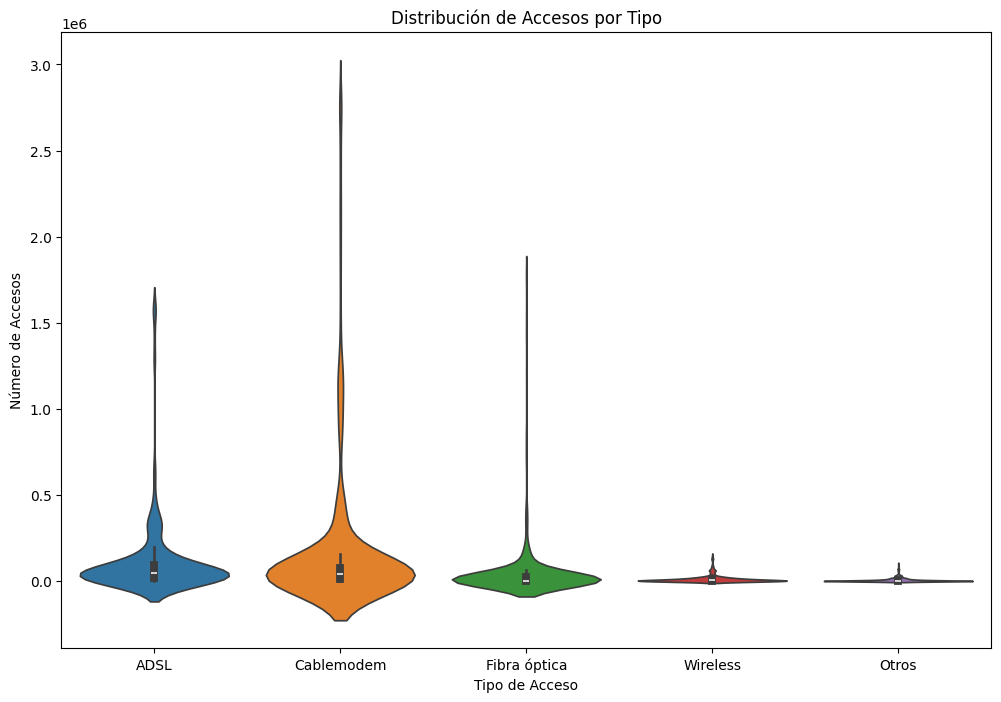

In [9]:
#Distribcuión por tipos de tecnología
# Configuración de la figura para el gráfico
plt.figure(figsize=(12, 8))  # Define el tamaño de la figura (ancho, alto) en pulgadas

# Crear un gráfico de violín para visualizar la distribución de accesos por tipo
sns.violinplot(
    data=acc_tec[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]  # Datos a visualizar
)

# Configurar las etiquetas de los ejes
plt.xlabel('Tipo de Acceso')  # Etiqueta para el eje x (tipos de acceso)
plt.ylabel('Número de Accesos')  # Etiqueta para el eje y (número de accesos)

# Configurar el título del gráfico
plt.title('Distribución de Accesos por Tipo')  # Título del gráfico

# Mostrar el gráfico
plt.show()


Este gráfico de violín proporcionando una visión más completa de la distribución de los datos para cada tipo de tecnología de acceso a internet. La longitud y la forma de cada "violín" reflejan la densidad de accesos en cada categoría tecnológica, permitiendo una comparación clara entre ellas.

Para el caso del Cablemodem, un violín más largo indica una alta densidad de accesos, lo que sugiere que esta tecnología es muy común o popular en comparación con otras. La mayor varianza o rango de accesos también indica que el número de usuarios varía ampliamente, desde cifras bajas hasta muy altas, mostrando la flexibilidad y popularidad de esta tecnología en el mercado.

Por otro lado, el gráfico de ADSL muestra un violín más corto, lo que refleja una menor densidad comparativa. Aunque ADSL sigue siendo una opción común, la menor variabilidad y concentración de accesos en esta categoría podrían indicar una tecnología en declive o menos dominante frente a alternativas más modernas.

La Fibra Óptica presenta un violín de tamaño intermedio, lo que sugiere que es una tecnología con una densidad y variabilidad de accesos que se sitúa entre Cablemodem y Wireless u Otros. 

En cuanto a Wireless y Otros, los gráficos más cortos sugieren que estas tecnologías tienen una menor densidad y variabilidad en el número de accesos. 

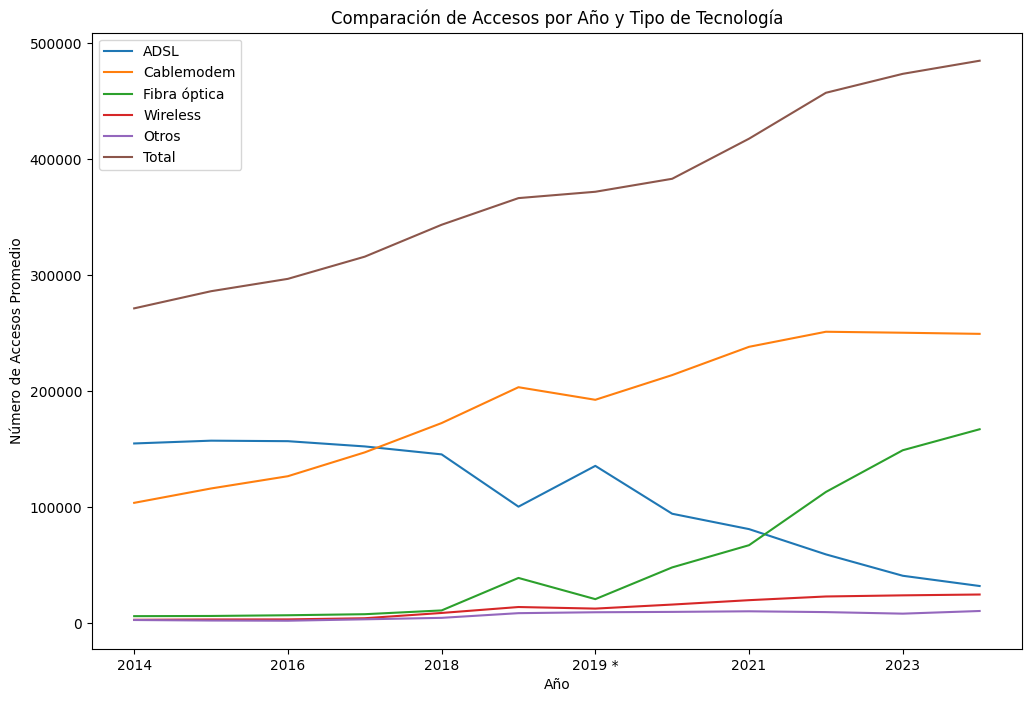

In [10]:
# Comparación entre años por tipo de tecnologia
# Configuración de la figura para el gráfico
plt.figure(figsize=(12, 8))  # Define el tamaño de la figura (ancho, alto) en pulgadas

# Iterar sobre las columnas de tipos de tecnología para graficar su promedio por año
for col in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']:
    # Agrupar los datos por año y calcular la media para cada tipo de tecnología
    acc_tec.groupby('Año')[col].mean().plot(label=col)

# Configurar las etiquetas de los ejes
plt.xlabel('Año')  # Etiqueta para el eje x (años)
plt.ylabel('Número de Accesos Promedio')  # Etiqueta para el eje y (número de accesos promedio)

# Configurar el título del gráfico
plt.title('Comparación de Accesos por Año y Tipo de Tecnología')  # Título del gráfico

# Mostrar la leyenda para identificar las líneas en el gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

El gráfico comparativo de accesos por año y tipo de tecnología ofrece una visión clara de cómo han evolucionado las preferencias de los consumidores y la adopción de diferentes tecnologías de acceso a internet. Se observa una disminución en el uso de ADSL, lo que refleja un cambio en la preferencia hacia tecnologías más avanzadas, como la Fibra Óptica. Esta última muestra un crecimiento acelerado, lo que sugiere una rápida adopción por parte del mercado. La línea de tendencia para Fibra Óptica, que se acerca a igualar el número de accesos de Cablemodem en 2024, indica que esta tecnología podría superar a Cablemodem en un futuro cercano.
Es impotante resaltar que el crecimiento de la Fibra Óptica sugiere que se están alineando con la demanda del mercado hacia tecnologías de acceso más modernas y eficientes. Este análisis también subraya la importancia de evaluar la competencia, ya que las tendencias observadas pueden identificar cuáles tecnologías están ganando terreno y cuáles están en declive.

<Figure size 1500x1000 with 0 Axes>

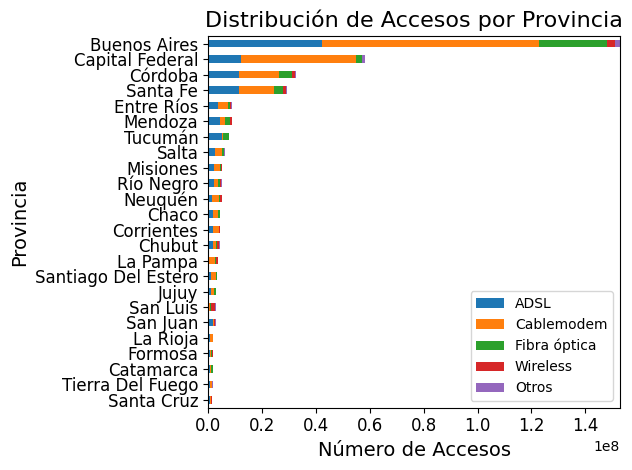

In [11]:
# Distribución de accesos de tipo de tecnoligía por provincia
# Agrupación por provincia y sumatoria de tipos de acceso
provincia_access = acc_tec.groupby('Provincia').sum()

# Ordenar provincias por el total de accesos (suma de todos los tipos de acceso)
provincia_access['Total'] = provincia_access[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1)
provincia_access_sorted = provincia_access.sort_values(by='Total', ascending=True)

# Crear el gráfico
plt.figure(figsize=(15, 10))  # Tamaño de la figura
ax = provincia_access_sorted[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(kind='barh', stacked=True)

# Ajustes para mejor legibilidad
plt.xlabel('Número de Accesos', fontsize=14)
plt.ylabel('Provincia', fontsize=14)
plt.title('Distribución de Accesos por Provincia', fontsize=16)
plt.xticks(fontsize=12)  # Ajustar tamaño de fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar tamaño de fuente de las etiquetas del eje y

# Ajustar límites del eje x si es necesario
ax.set_xlim(0, provincia_access_sorted[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1).max())

plt.tight_layout()  # Ajustar el diseño para que todo encaje bien
plt.show()

La distribución de accesos a internet por provincia revela datos clave que pueden guiar la planificación y estrategia de expansión de la compañía . La alta concentración de accesos en Buenos Aires y Capital Federal indica que estas áreas urbanas podrían ser focos estratégicos para mejorar o expandir la oferta de servicios, aprovechando la alta demanda existente. Por otro lado, la situación en provincias como Santa Cruz, con menor acceso, sugiere la necesidad de iniciativas específicas para mejorar la infraestructura y facilitar un mayor acceso a internet, reduciendo así las desigualdades regionales.

En términos de optimización de recursos, es esencial que las provincias con alta demanda reciban una mayor asignación de recursos para actualizar y mantener sus servicios, mientras que en las provincias con menos accesos, se deberían enfocar esfuerzos para aumentar tanto la cobertura como la calidad del servicio. Esto no solo garantiza un servicio más equilibrado y accesible en todo el país, sino que también impulsa un desarrollo más equitativo entre las diferentes regiones.



### Velocidad de conexión


Aquí se examinarán las velocidades de conexión a Internet disponibles para los usuarios en diferentes áreas del país. Se identificaran las zonas con las mejores y peores velocidades para proporcionar una visión clara de la experiencia de navegación en el país.

In [12]:
acc_loc_velrangos.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

In [13]:
# Resumen estadístico
print(acc_loc_velrangos[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps','+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps',
    ]].describe())

       HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
count      984.000000           984.000000       9.840000e+02   
mean      1967.099593          9134.977642       1.347227e+05   
std      12757.059460         20796.531611       3.245957e+05   
min          6.000000             0.000000       1.336000e+03   
25%         41.000000           384.750000       2.417200e+04   
50%        107.000000          2217.500000       4.285500e+04   
75%        467.250000          6946.750000       8.389625e+04   
max     238920.000000        171244.480000       2.299705e+06   

       + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  \
count          984.000000           984.000000           984.000000   
mean         38149.252033         37076.536585         20064.129065   
std          64289.080670         88748.124134         69777.001896   
min              0.000000             0.000000             0.000000   
25%           3662.500000          2336.250000            4

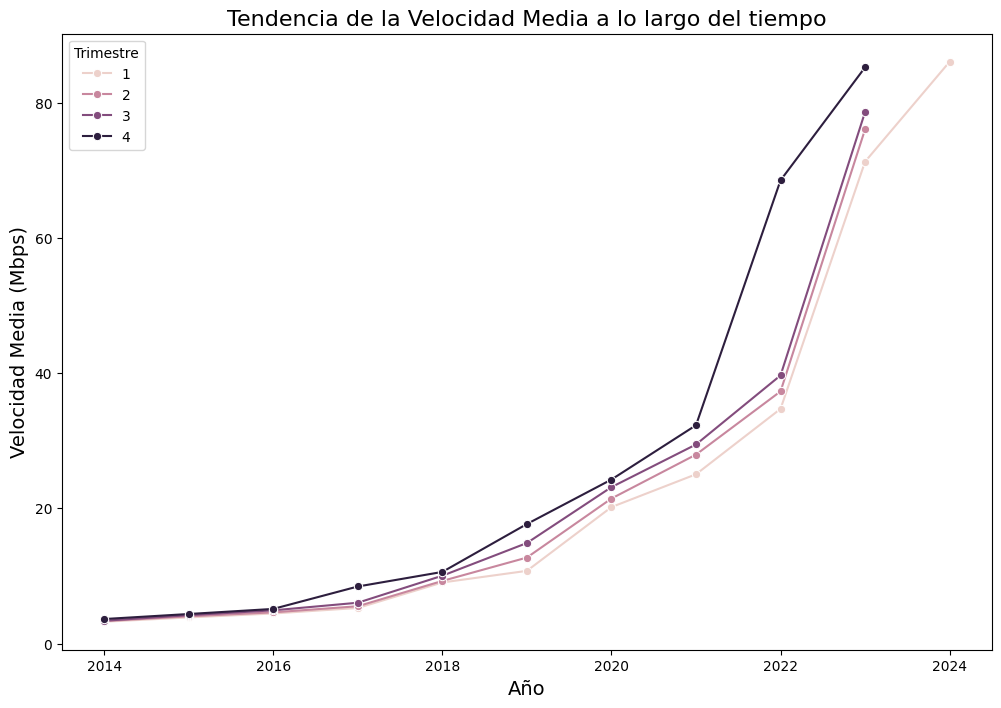

In [14]:
# Agrupar por Año, Trimestre y calcular la media de 'Velocidad Media'
vel_tiempo = vel_media_prov.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].mean().reset_index()

# Gráfico de la tendencia de la Velocidad Media a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=vel_tiempo, x='Año', y='Mbps (Media de bajada)', hue='Trimestre', marker='o')
# Configurar el título y las etiquetas del gráfico
plt.title('Tendencia de la Velocidad Media a lo largo del tiempo', fontsize=16)  # Título del gráfico con tamaño de fuente ajustado
plt.xlabel('Año', fontsize=14)  # Etiqueta del eje x con tamaño de fuente ajustado
plt.ylabel('Velocidad Media (Mbps)', fontsize=14)  # Etiqueta del eje y con tamaño de fuente ajustado

# Mostrar el gráfico
plt.show()


El aumento en la velocidad media de las conexiones a lo largo del tiempo sugiere una mejora significativa en la infraestructura de telecomunicaciones. Esto ha permitido que los usuarios accedan a conexiones más rápidas, lo que podría estar relacionado con la expansión de tecnologías más avanzadas, como la fibra óptica, la modernización de las redes DSL, y la adopción de conexiones de banda ancha más rápidas.
La tendencia al alza en la velocidad media también puede ser un indicativo del creciente consumo de datos y la demanda de servicios de internet de alta velocidad. El aumento en el uso de aplicaciones que requieren un mayor ancho de banda, como el streaming de video, las videoconferencias y los juegos en línea, ha impulsado a las empresas a mejorar sus redes.

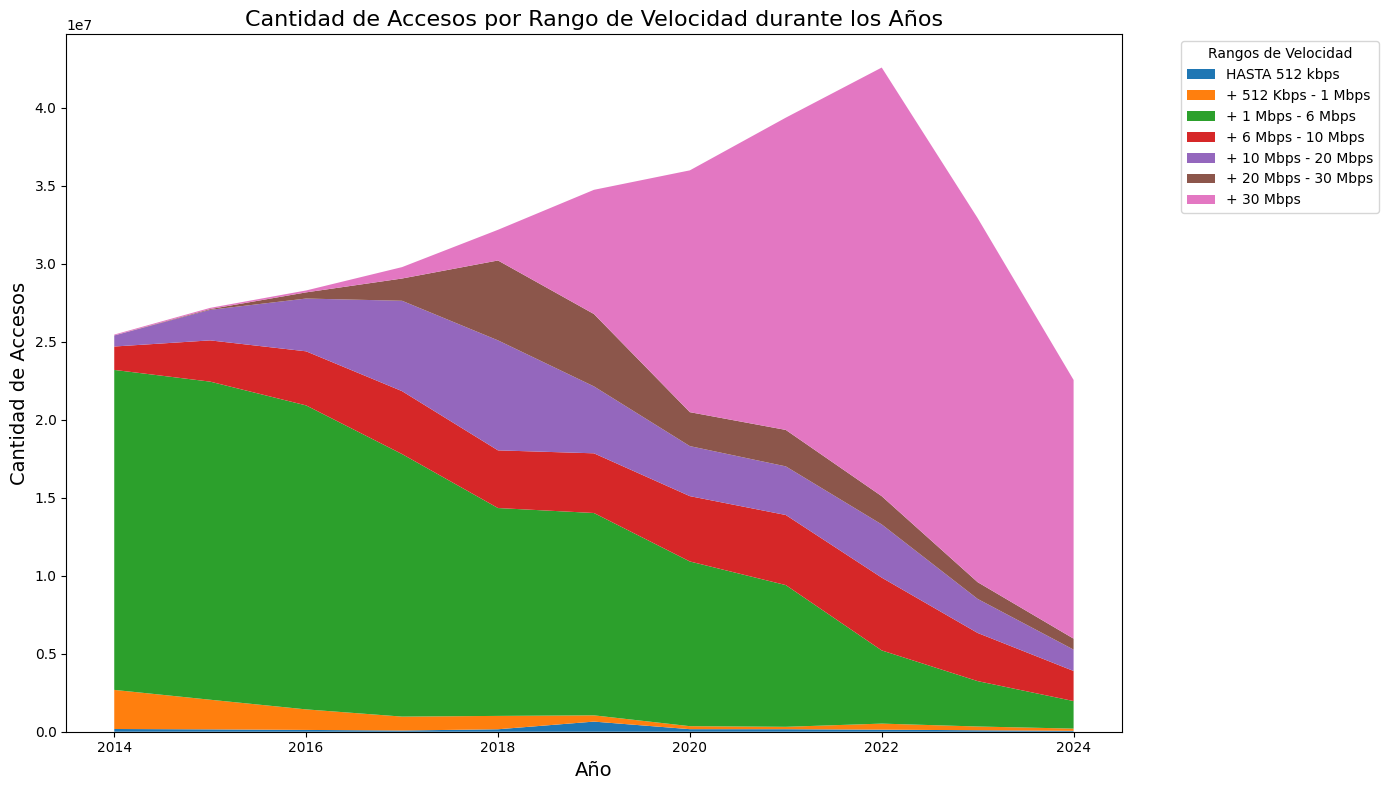

In [15]:
# Cantidad de accesos por rango de velociadad duante los años
# Agrupar los datos por Año, sumando los accesos en cada rango de velocidad
df_grouped = acc_loc_velrangos.groupby('Año')[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                                 '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
                                 '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']].sum().reset_index()
# Agrupa los datos por año y calcula la suma de accesos en cada rango de velocidad.
# El método reset_index() convierte el resultado en un DataFrame estándar para facilitar su uso en la visualización

# Crear la gráfica de líneas apiladas
plt.figure(figsize=(14, 8))  # Configura el tamaño de la figura para asegurar una visualización clara
plt.stackplot(df_grouped['Año'], 
              df_grouped['HASTA 512 kbps'], df_grouped['+ 512 Kbps - 1 Mbps'], df_grouped['+ 1 Mbps - 6 Mbps'],
              df_grouped['+ 6 Mbps - 10 Mbps'], df_grouped['+ 10 Mbps - 20 Mbps'],
              df_grouped['+ 20 Mbps - 30 Mbps'], df_grouped['+ 30 Mbps'], 
              labels=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                      '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
                      '+ 20 Mbps - 30 Mbps', '+ 30 Mbps'])
# Utiliza stackplot para crear una gráfica apilada que muestra la distribución de accesos en cada rango de velocidad
# 'labels' asigna nombres descriptivos a cada área apilada para la leyenda

# Personalizar el gráfico
plt.title('Cantidad de Accesos por Rango de Velocidad durante los Años', fontsize=16)  # Establece el título del gráfico con un tamaño de fuente adecuado
plt.xlabel('Año', fontsize=14)  # Etiqueta del eje x con tamaño de fuente ajustado
plt.ylabel('Cantidad de Accesos', fontsize=14)  # Etiqueta del eje y con tamaño de fuente ajustado
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Rangos de Velocidad")  
# Añade una leyenda ubicada fuera del gráfico (a la derecha) con un título descriptivo

plt.tight_layout()  # Ajusta el diseño para asegurar que todos los elementos encajen correctamente en la figura
plt.show()  # Muestra el gráfico en la pantalla


El análisis de la evolución de los accesos a internet por rango de velocidad muestra un notable aumento en las conexiones superiores a 30 Mbps, lo cual refleja una creciente demanda por parte de los usuarios de conexiones más rápidas y robustas. Esta tendencia puede estar impulsada por la necesidad de mayor ancho de banda para actividades que requieren una conexión estable y de alta velocidad, como el streaming de video en alta definición, el gaming en línea, las videoconferencias, y el uso intensivo de aplicaciones basadas en la nube. La preferencia por estas velocidades más altas es un claro indicador de que los consumidores están buscando mejorar su experiencia digital, adaptándose a las exigencias tecnológicas contemporáneas. No obstante, es relevante destacar un fenómeno inusual que se observa en los datos: a pesar de la tendencia general de crecimiento en las velocidades de conexión más altas, hay un pico notable en el rango de +30 Mbps, seguido de una disminución en los accesos a partir del año 2023. Este descenso inesperado en la cantidad de accesos de alta velocidad, a pesar de un crecimiento general en otros aspectos del acceso a internet, podría deberse a varios factores. Entre estos podrían incluirse ajustes en la infraestructura, cambios en la demanda regional o una posible saturación del mercado de alta velocidad.

Ante este panorama, se recomienda prestar especial atención a la expansión y mejora de la infraestructura para soportar estas altas velocidades, asegurándose de poder satisfacer la creciente demanda sin comprometer la calidad del servicio. Es crucial  inviertir en la planificación y expansión de sus redes, sino también la expansión de la cobertura de fibra óptica, que es fundamental para proporcionar velocidades más rápidas y una conectividad más fiable.

C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_17256\4099206215.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vel_media_prov, x='Provincia', y='Mbps (Media de bajada)', palette='viridis')


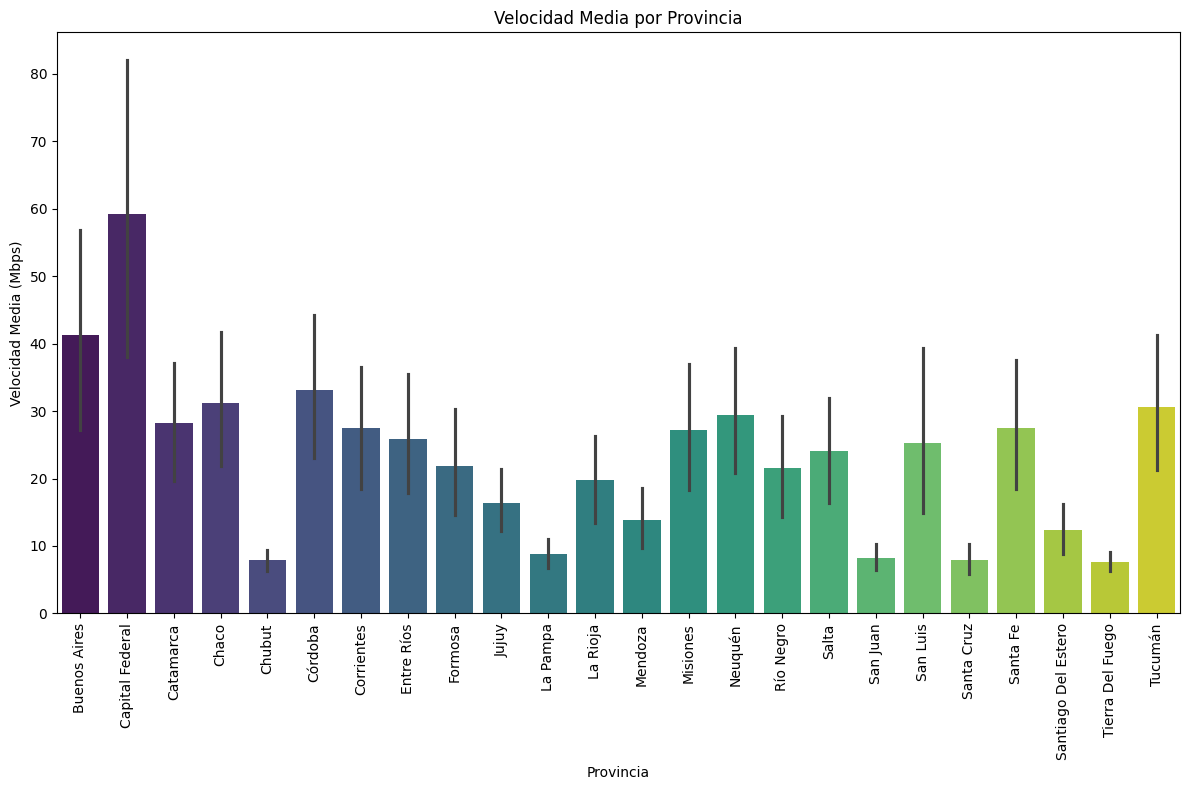

In [16]:
# Crear una nueva columna de velocidad media
# En esta línea, calculamos la velocidad media ponderada basada en los diferentes rangos de velocidad
# Cada rango tiene un peso que representa una estimación de su velocidad media, 
# y se multiplica por el número de accesos en ese rango.
# Finalmente, sumamos estas contribuciones y las dividimos por el total de accesos para obtener la velocidad media ponderada por localidad.
acc_loc_velrangos['Velocidad Media'] = (
    acc_loc_velrangos['HASTA 512 kbps'] * 0.256 + 
    acc_loc_velrangos['+ 512 Kbps - 1 Mbps'] * 0.756 +
    acc_loc_velrangos['+ 1 Mbps - 6 Mbps'] * 3.5 +
    acc_loc_velrangos['+ 6 Mbps - 10 Mbps'] * 8 +
    acc_loc_velrangos['+ 10 Mbps - 20 Mbps'] * 15 +
    acc_loc_velrangos['+ 20 Mbps - 30 Mbps'] * 25 +
    acc_loc_velrangos['+ 30 Mbps'] * 40
) / acc_loc_velrangos['Total']

# Crear el gráfico de barras para visualizar la velocidad media por provincia
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
# Usar seaborn para crear un gráfico de barras de la velocidad media por provincia
sns.barplot(data=vel_media_prov, x='Provincia', y='Mbps (Media de bajada)', palette='viridis')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.title('Velocidad Media por Provincia')  # Título del gráfico
plt.xlabel('Provincia')  # Etiqueta del eje x
plt.ylabel('Velocidad Media (Mbps)')  # Etiqueta del eje y
plt.tight_layout()  # Ajustar el diseño para que todos los elementos encajen bien en la figura
plt.show()  # Mostrar el gráfico



El análisis de la velocidad media de internet revela una notable disparidad entre las provincias argentinas. La Capital Federal y Buenos Aires presentan las velocidades medias más altas, mientras que provincias como Tierra del Fuego, Santa Cruz, Chubut y La Pampa muestran velocidades significativamente menores.
En áreas urbanas densamente pobladas como la Capital Federal y Buenos Aires, la infraestructura de telecomunicaciones suele ser más avanzada, con una mayor disponibilidad de tecnologías modernas como la fibra óptica. Esto permite que estos lugares ofrezcan velocidades de internet superiores. En contraste, provincias más alejadas y menos densamente pobladas enfrentan desafíos significativos para la implementación de tecnologías avanzadas, lo que resulta en velocidades medias más bajas.

C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_17256\1090753553.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mbps (Media de bajada)', y='Provincia', data=vel_media_prov, palette='coolwarm')


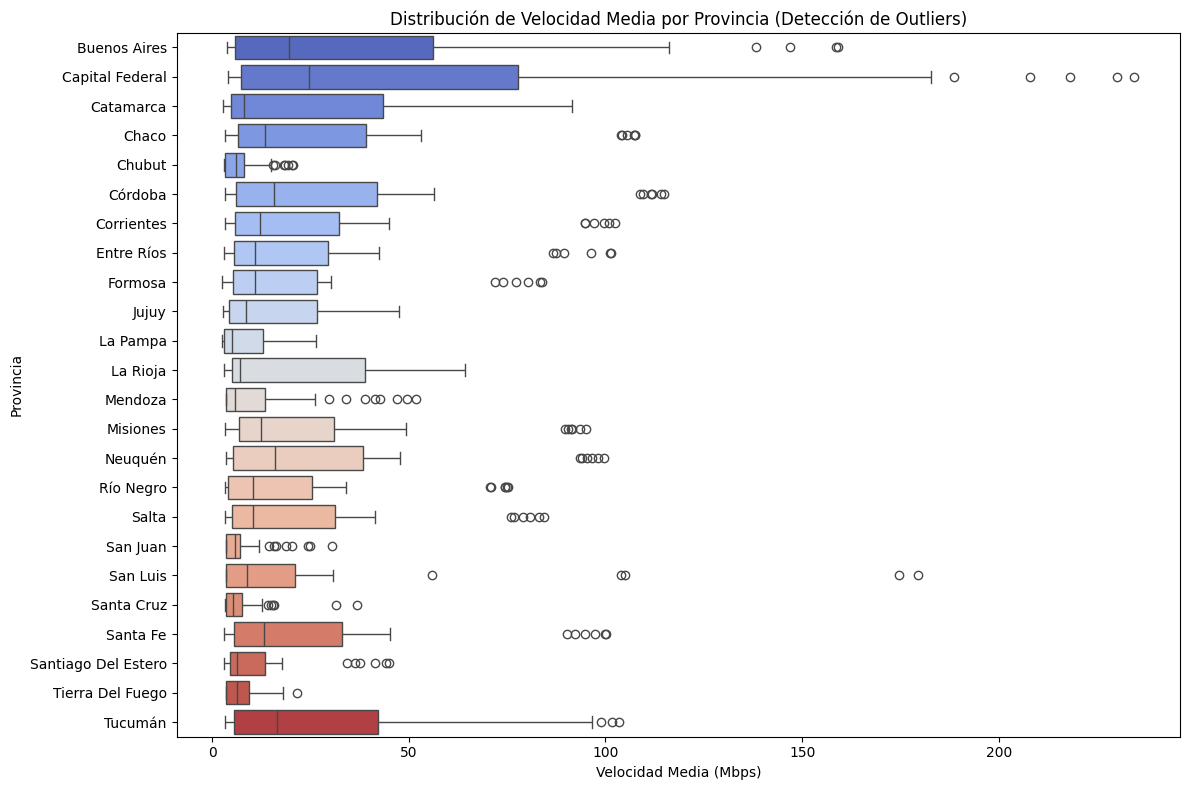

In [17]:
# Crear un boxplot para visualizar la distribución de la velocidad media por provincia
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura

# Usar seaborn para crear el boxplot
# En este gráfico, el eje x representa la 'Velocidad Media (Mbps)' y el eje y representa las 'Provincias'
# El boxplot ayuda a visualizar la distribución de los datos, identificar la mediana, los cuartiles y los outliers.
sns.boxplot(x='Mbps (Media de bajada)', y='Provincia', data=vel_media_prov, palette='coolwarm')

plt.title('Distribución de Velocidad Media por Provincia (Detección de Outliers)')  # Título del gráfico
plt.xlabel('Velocidad Media (Mbps)')  # Etiqueta del eje x
plt.ylabel('Provincia')  # Etiqueta del eje y
plt.tight_layout()  # Ajustar el diseño para que todos los elementos encajen bien en la figura
plt.show()  # Mostrar el gráfico



El boxplot de la velocidad media de internet por provincia proporciona una visión clara de la variabilidad y presencia de outliers en los datos. La Capital Federal destaca por tener la caja de distribución más alta, lo que indica que en promedio, las velocidades medias de internet en esta provincia son significativamente mayores en comparación con las demás. La caja alta en el boxplot refleja un rango intercuartil (IQR) y una mediana elevados, sugiriendo una infraestructura de internet avanzada y una alta demanda de servicios tecnológicos en la Capital Federal. Esto se debe probablemente a la mayor concentración de servicios y recursos en esta área.

Las provincias de Tucumán y Buenos Aires siguen a la Capital Federal en términos de velocidades medias, con cajas de distribución elevadas que indican que también cuentan con buena infraestructura de internet. Aunque estas provincias no alcanzan el nivel de la Capital Federal, su posición en el gráfico sugiere que gozan de una conectividad relativamente buena en comparación con la mayoría de las otras provincias. Esta situación puede estar vinculada a una infraestructura sólida y una demanda significativa de servicios de internet en estas regiones.

Por otro lado, San Juan y Chubut presentan cajas de distribución más bajas y cortas, lo que indica que las velocidades medias en estas provincias tienden a ser más bajas y con menor variabilidad. Sin embargo, la presencia de algunos outliers en estas provincias sugiere que existen casos excepcionales donde las velocidades pueden ser significativamente más altas. Esto puede deberse a áreas específicas con mejor infraestructura o a usuarios que acceden a servicios premium, a pesar de la infraestructura general limitada en estas provincias.

Mendoza muestra una caja de distribución de tamaño mediano, lo que sugiere velocidades medias moderadas en comparación con otras provincias. La presencia de varios outliers cercanos a 30 Mbps indica que, aunque la mayoría de los usuarios en Mendoza experimentan velocidades moderadas, hay casos donde se alcanzan velocidades significativamente más altas. Esto sugiere una variabilidad considerable en la calidad del servicio de internet en Mendoza, con ciertos usuarios o áreas disfrutando de mejor conectividad.

La existencia de outliers en provincias como San Juan, Chubut y Mendoza señala que, aunque la mayoría de la población en estas regiones tiene acceso a velocidades más bajas, hay segmentos con acceso a servicios de internet mucho mejores. Estos outliers podrían ser el resultado de áreas específicas con mejor infraestructura o de usuarios que optan por servicios premium.

En conclusión, el boxplot revela una clara disparidad en la velocidad media de internet entre las provincias argentinas. Las provincias con cajas de distribución más altas suelen tener mejores velocidades medias, lo que refleja una infraestructura más desarrollada y una mayor demanda de servicios de alta velocidad. En contraste, las provincias con cajas más bajas y cortas tienden a tener velocidades más bajas en general, aunque algunos casos excepcionales muestran velocidades mucho mayores. La presencia de outliers en varias provincias destaca las disparidades en el acceso a internet dentro de esas regiones, lo que puede indicar desigualdades en la distribución de servicios de internet.

## EVALUACION DEL ACCESO A TECNOLOGIAS DIAL-UP Y BANDA ANCHA (BAF)

Dial-up y banda ancha (BAF, Broadband Access Facility) son dos tipos de tecnologías de conexión a Internet, pero difieren significativamente en velocidad, calidad y método de conexión. 

*La Dial-up: Utiliza una línea telefónica analógica para conectarse a Internet.

*Banda Ancha (BAF): Utiliza una conexión digital (como cable, fibra óptica, DSL) que está siempre activa y no interfiere con la línea telefónica.

En este aparte se evaluará la prevalencia de cada tecnología, su impacto en la calidad del servicio y su evolución a lo largo del tiempo. Este estudio permitirá entender mejor la transición tecnológica y cómo la adopción de banda ancha ha afectado al acceso a Internet.

In [18]:
print(total_dialbaf[['Banda ancha fija', 'Dial up', 'Total']].describe())

       Banda ancha fija       Dial up         Total
count      4.100000e+01     41.000000  4.100000e+01
mean       8.727362e+06  21726.707317  8.749089e+06
std        1.708095e+06  10144.701376  1.699043e+06
min        6.362108e+06   9991.000000  6.398398e+06
25%        7.178340e+06  11793.000000  7.206950e+06
50%        8.626323e+06  21812.000000  8.648135e+06
75%        1.007518e+07  28610.000000  1.008554e+07
max        1.162136e+07  39324.000000  1.163316e+07


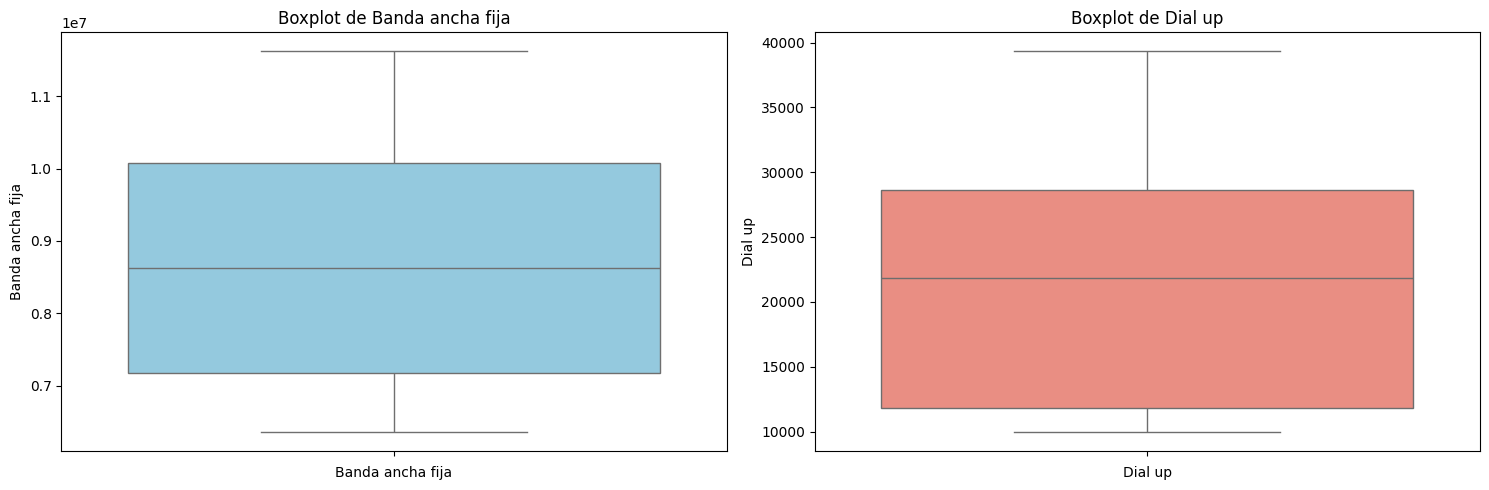

In [19]:
# Configurar la figura y los ejes para los boxplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Crear una figura con dos subplots en una fila

# Crear el boxplot para 'Banda ancha fija'
sns.boxplot(data=total_dialbaf['Banda ancha fija'], ax=axs[0], color='skyblue')
axs[0].set_title('Boxplot de Banda ancha fija')  # Establecer el título del primer subplot
axs[0].set_xlabel('Banda ancha fija')  # Etiqueta del eje x del primer subplot

# Crear el boxplot para 'Dial up'
sns.boxplot(data=total_dialbaf['Dial up'], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot de Dial up')  # Establecer el título del segundo subplot
axs[1].set_xlabel('Dial up')  # Etiqueta del eje x del segundo subplot

# Ajustar el diseño para que los subplots no se superpongan
plt.tight_layout()
plt.show()  # Mostrar el gráfico



El análisis de los boxplots revela diferencias notables en la distribución de las conexiones de banda ancha y dial up. El boxplot de banda ancha fija muestra una caja de distribución más alta en comparación con el boxplot de dial up. Esta mayor caja de distribución indica que, en general, las velocidades de banda ancha son significativamente superiores a las de dial up. La mediana de banda ancha fija también se encuentra en un nivel más alto, lo que refleja un acceso más generalizado a Banda ancha. 
En contraste, el boxplot de dial up presenta una caja de distribución más baja, lo que indica que las velocidades de conexión por dial up son considerablemente más bajas en comparación con la banda ancha. La mediana de dial up también se ubica a un nivel inferior, mostrando que el acceso a velocidades de dial up es menos competitivo en términos de rapidez en comparación con la banda ancha fija.
Estas observaciones sugieren que la transición hacia la banda ancha está marcando una clara mejora en las velocidades de conexión, reflejando la evolución hacia tecnologías de internet más rápidas y eficientes. La baja distribución de velocidades en dial up podría estar impulsada por una reducción en el uso de esta tecnología en favor de opciones más rápidas y modernas. Esta tendencia también puede estar asociada con el progreso en la infraestructura de telecomunicaciones, que favorece la adopción de tecnologías de banda ancha sobre las más antiguas, como el dial up.

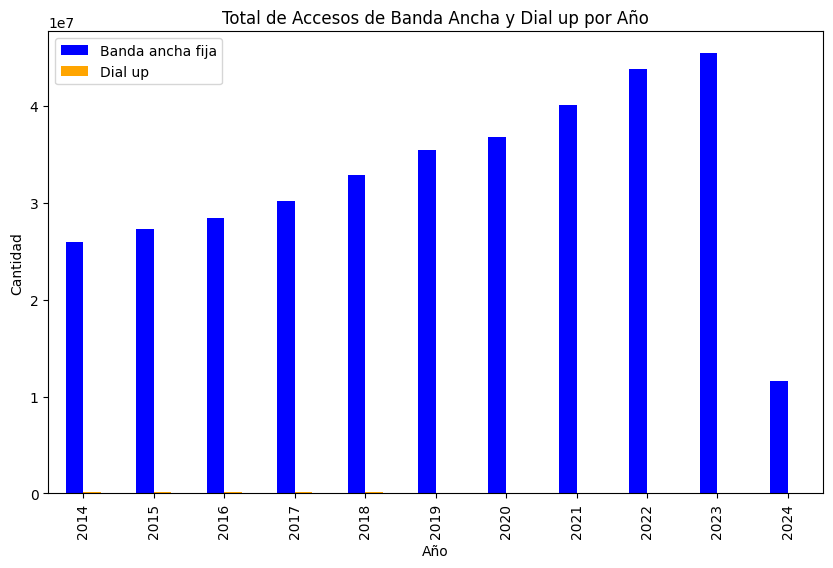

In [20]:
# Agrupar los datos por año y calcular la suma total de 'Banda ancha fija' y 'Dial up'
total_dialbaf_grouped = total_dialbaf.groupby('Año')[['Banda ancha fija', 'Dial up']].sum()

# Crear el gráfico de barras para visualizar el total de 'Banda ancha fija' y 'Dial up' por año
total_dialbaf_grouped.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])  # Color para cada tipo de acceso

# Personalizar el gráfico
plt.title('Total de Accesos de Banda Ancha y Dial up por Año')  # Título del gráfico
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.xlabel('Año')  # Etiqueta del eje x

# Mostrar el gráfico
plt.show()



El análisis del gráfico de barras indica un claro cambio hacia la banda ancha como la opción preferida para la conexión a Internet, mientras que el dial up sigue en declive. Este patrón sugiere que los usuarios están cada vez más inclinados a optar por tecnologías que ofrecen velocidades más rápidas y una mejor experiencia general de conexión. 

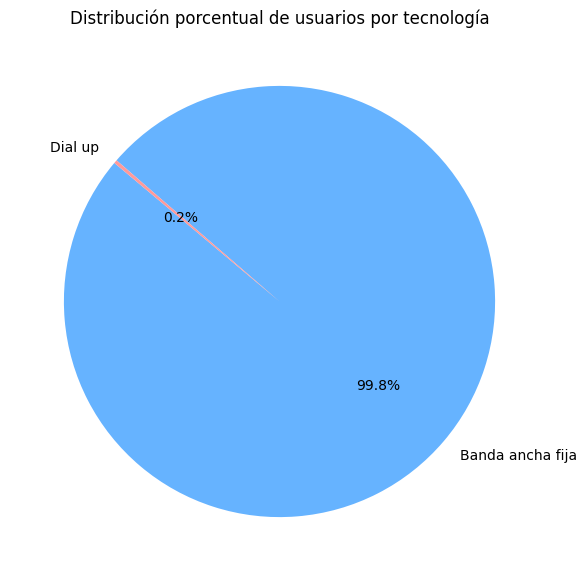

In [21]:
# Calcular los totales de ambas tecnologías
total_banda_ancha = total_dialbaf['Banda ancha fija'].sum()  # Suma total de accesos para 'Banda ancha fija'
total_dial_up = total_dialbaf['Dial up'].sum()  # Suma total de accesos para 'Dial up'

# Preparar los datos para el gráfico de torta
tecnologias = ['Banda ancha fija', 'Dial up']  # Etiquetas para el gráfico de torta
totales = [total_banda_ancha, total_dial_up]  # Valores totales para cada tecnología

# Crear el gráfico de torta
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(totales, labels=tecnologias, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])  
# 'autopct' muestra el porcentaje en cada segmento, 'startangle' rota el gráfico para mejor visualización, y 'colors' define los colores para cada segmento.

# Título del gráfico
plt.title('Distribución porcentual de usuarios por tecnología')  

# Mostrar el gráfico
plt.show()


 La gráfica de torta confirma que la banda ancha fija domina el panorama de la conectividad, mientras que el dial up se encuentra en una etapa de prácticamente desaparición. Este cambio subraya la importancia de continuar invirtiendo en la infraestructura de banda ancha para seguir satisfaciendo las crecientes demandas de los usuarios y mantenerse al día con las tendencias tecnológicas actuales.

## ANALISIS DE INGRESOS EN LA INDUSTRIA DE TELECOMUNICACIONES

En esta sección, se realizará un análisis de los ingresos generados por la industria de telecomunicaciones en Argentina. Se examinarán las tendencias de crecimiento y su evolución reciente.

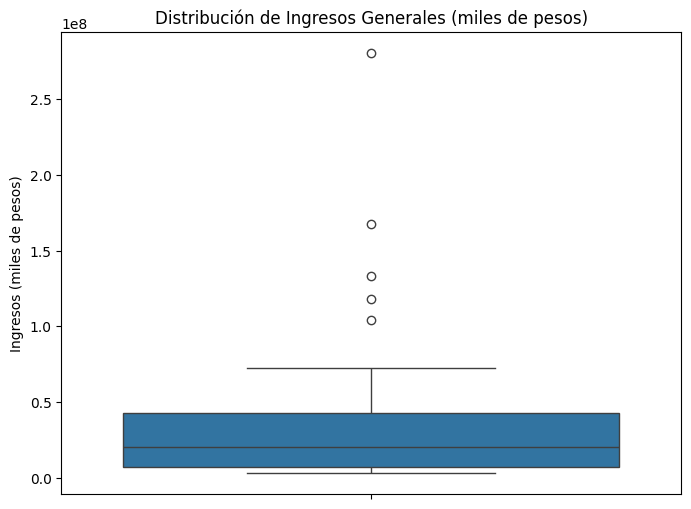

In [22]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura a 8x6 pulgadas

# Crear el gráfico de caja para la distribución de ingresos
sns.boxplot(y=ingresos['Ingresos (miles de pesos)'])  
# 'y' se establece como la columna de ingresos, lo que visualiza la distribución de los valores de ingresos.

# Añadir título al gráfico
plt.title('Distribución de Ingresos Generales (miles de pesos)')  

# Etiquetar el eje y
plt.ylabel('Ingresos (miles de pesos)')  

# Mostrar el gráfico
plt.show()  


La caja del gráfico se encuentra predominantemente entre 0.1 y 0.5 miles de pesos, lo que indica que la mayoría de los ingresos están concentrados dentro de este rango.
El gráfico también destaca la presencia de varios outliers que se extienden más allá del umbral de 2.5 miles de pesos. Estos outliers representan casos excepcionales de ingresos significativamente más altos en comparación con la mayoría de los datos. La existencia de estos valores atípicos puede indicar la presencia de eventos o entidades con ingresos excepcionalmente altos, que son considerablemente diferentes del resto de la muestra. Es importante investigar estos casos de ingresos elevados para determinar si son excepcionales o si podrían reflejar oportunidades de negocio, áreas de alto rendimiento o incluso errores de registro.

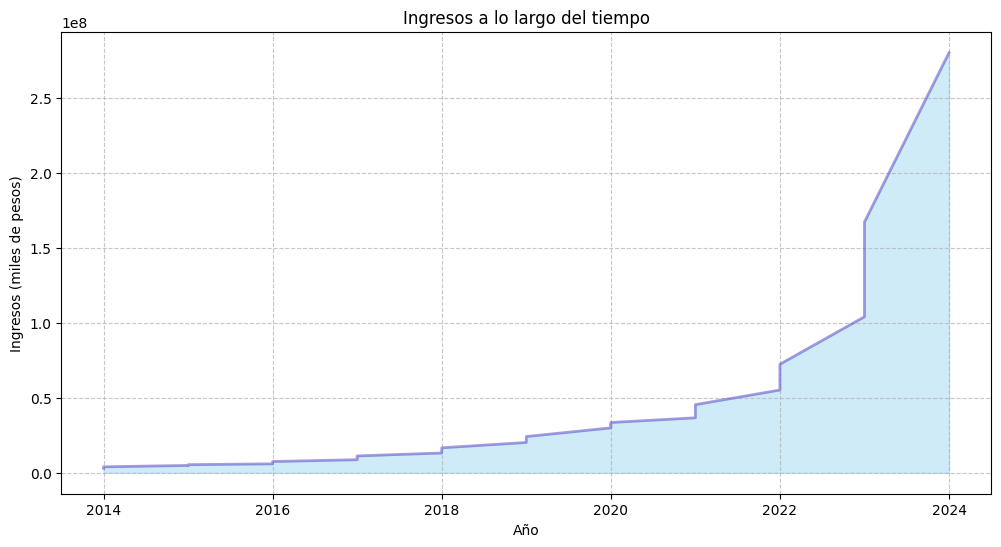

In [23]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))  
# Ajusta el tamaño de la figura a 12x6 pulgadas para una visualización clara y amplia.

# Crear el gráfico de área con color de fondo
plt.fill_between(ingresos['Año'], 
                 ingresos['Ingresos (miles de pesos)'], 
                 color='skyblue', alpha=0.4)  
# 'fill_between' rellena el área bajo la curva de ingresos con un color azul claro y un alpha de 0.4 (transparencia).

# Añadir la línea que representa los ingresos
plt.plot(ingresos['Año'], 
         ingresos['Ingresos (miles de pesos)'], 
         color='Slateblue', alpha=0.6, linewidth=2)  
# 'plot' dibuja una línea sobre el área rellena en un color azul slate con alpha 0.6 (transparencia) y un grosor de línea de 2.

# Añadir título al gráfico
plt.title('Ingresos a lo largo del tiempo')  

# Etiquetar el eje x
plt.xlabel('Año')  

# Etiquetar el eje y
plt.ylabel('Ingresos (miles de pesos)')  

# Añadir una cuadrícula con líneas punteadas
plt.grid(True, linestyle='--', alpha=0.7)  
# 'grid' activa la cuadrícula con líneas punteadas y un alpha de 0.7 para una mejor visibilidad sin distraer de los datos.

# Mostrar el gráfico
plt.show()  




Desde el inicio del período en 2014, los ingresos han mostrado un incremento continuo, lo cual sugiere un crecimiento sostenido en la actividad económica o en la eficiencia de las operaciones financieras. Este crecimiento consistente puede ser indicativo de una expansión exitosa en el mercado, mejoras en la oferta de productos o servicios, o una mayor captación de clientes y mercados. Es relevante destacar que el patrón de crecimiento constante refleja una estabilidad en la generación de ingresos, lo cual es positivo para la salud financiera y la viabilidad a largo plazo del sector.

## ANALISIS DE SERVICIOS POR LOCALIZACION

### Areas metropolitanas y localidades

Este apartado se enfocará en cómo los servicios de telecomunicaciones se distribuyen en diferentes áreas geográficas de Argentina.

In [24]:
mapa_conectividad.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,--,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,--,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,SI,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358


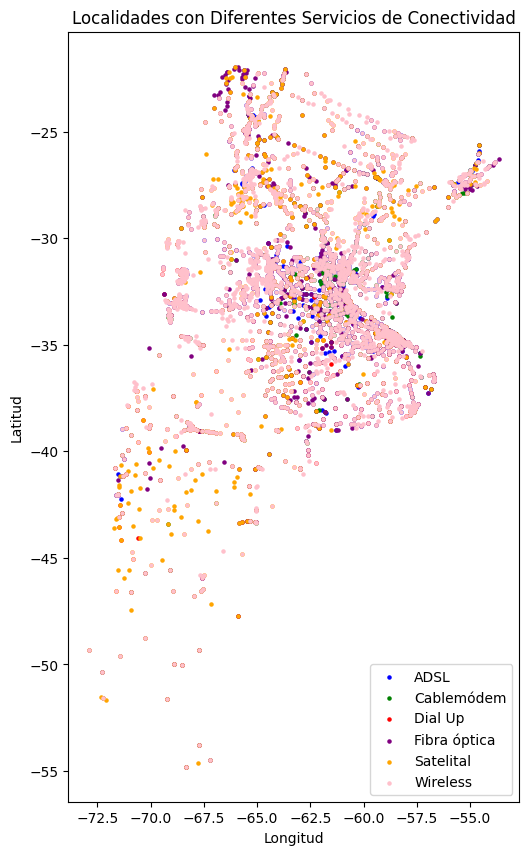

In [25]:
# Supongamos que el DataFrame 'mapa_conectividad' ya está cargado
gdf = gpd.GeoDataFrame(mapa_conectividad, geometry=gpd.points_from_xy(mapa_conectividad.Longitud, mapa_conectividad.Latitud))

# Reemplazar "SI" por 1 y "--" por 0 en las columnas de servicios
reemplazos = {'SI': 1, '--': 0}
servicios_columns = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless']

for col in servicios_columns:
    gdf[col] = gdf[col].replace(reemplazos).astype(int)

# Guardar los cambios en un archivo CSV y Parquet
gdf.to_csv('mapa_conectividad.csv', index=False)


# Filtrar localidades por servicios
servicios = {
    'ADSL': gdf[gdf['ADSL'] > 0],
    'Cablemódem': gdf[gdf['Cablemódem'] > 0],
    'Dial Up': gdf[gdf['Dial Up'] > 0],
    'Fibra óptica': gdf[gdf['Fibra óptica'] > 0],
    'Satelital': gdf[gdf['Satelital'] > 0],
    'Wireless': gdf[gdf['Wireless'] > 0],
    }

# Configurar la visualización del mapa
fig, ax = plt.subplots(figsize=(15, 10))

# Colores para cada servicio
colores = {
    'ADSL': 'blue',
    'Cablemódem': 'green',
    'Dial Up': 'red',
    'Fibra óptica': 'purple',
    'Satelital': 'orange',
    'Wireless': 'pink',
    }

# Graficar cada servicio en el mapa
for servicio, data in servicios.items():
    if not data.empty:
        data.plot(ax=ax, color=colores[servicio], markersize=5, label=servicio)

# Añadir leyenda y título
plt.legend()
plt.title('Localidades con Diferentes Servicios de Conectividad')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()


El análisis indica que mientras las regiones del centro y norte del país están bien cubiertas con diversos servicios de conectividad, hay una clara necesidad de mejorar la infraestructura en el oeste y el sur. Para abordar esta desigualdad en la distribución, es esencial que se consideren estrategias específicas para expandir la cobertura en las áreas menos servidas.
La mayor concentración de servicios de conectividad se encuentra en el centro del país y hacia el norte, particularmente en áreas cercanas al mar, como el Océano Atlántico. Esta región muestra una amplia distribución de diversos tipos de servicios, como ADSL, cablemódem, fibra óptica, satelital y wireless. La densidad de estos servicios en el centro y norte puede atribuirse a la mayor población y a la infraestructura más desarrollada en estas zonas urbanas y suburbanas. Los centros urbanos más grandes en estas áreas suelen tener un acceso más amplio a tecnologías avanzadas debido a la alta demanda y la capacidad económica para mantener y expandir la infraestructura de telecomunicaciones.
En el sur del país, la dispersión de los servicios es aún más evidente. Aquí, los productos de conectividad se encuentran mucho más espaciados, lo que indica una menor densidad de cobertura y posiblemente una infraestructura menos desarrollada. Las áreas del sur, a menudo más rurales y menos pobladas, pueden tener menos acceso a tecnologías avanzadas, reflejando las dificultades económicas y logísticas para extender los servicios a estas zonas menos accesibles.
Comprender estos patrones es crucial para diseñar estrategias que promuevan un mejor acceso e ingreso en estos sectores que son potencialmente interesantes para el crecimiento del sector. 